In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [13]:
csv_paths = [
    "../datasets/PlantDoc-Random.csv",
    "../datasets/PlantDoc-ImageNet.csv",
    "../datasets/PlantDoc-PDDD.csv",
]
csv_path = csv_paths[0]
seed = 19

In [14]:
df_comparison = pd.DataFrame()

for i, path in enumerate(csv_paths):
    df_full = pd.read_csv(csv_path, index_col=0)
    df_comparison[f"target_{i}"] = df_full["target"]
    df_comparison[f"set_{i}"] = df_full["set"]

In [15]:
df_comparison[df_comparison.columns[0::2]].T.duplicated()
# first row must be False, all other True

target_0    False
target_1     True
target_2     True
dtype: bool

In [16]:
df_comparison[df_comparison.columns[1::2]].T.duplicated()
# first row must be False, all other True

set_0    False
set_1     True
set_2     True
dtype: bool

In [17]:
df_full = pd.read_csv(csv_path, index_col=0)
df_train, df_valid = df_full[(mask := df_full["set"] == "train")], df_full[~mask]

print(f"Train size: {len(df_train)}")
df_train_targets = df_train["target"]
df_train_features = df_train.loc[:, ~df_train.columns.isin(["target", "set"])]
print(df_train_targets.value_counts()[:5])

print(f"Validation size: {len(df_valid)}")
df_valid_targets = df_valid["target"]
df_valid_features = df_valid.loc[:, ~df_valid.columns.isin(["target", "set"])]
print(df_valid_targets.value_counts()[:5])

Train size: 1873
target
8     144
18    112
15     99
13     89
11     87
Name: count, dtype: int64
Validation size: 469
target
8     36
18    28
15    25
13    23
11    22
Name: count, dtype: int64


In [18]:
scaler = StandardScaler()
train_features = scaler.fit_transform(df_train_features)
valid_features = scaler.transform(df_valid_features)

In [19]:
tsne = TSNE(n_components=2, random_state=seed)
train_features_reduced = tsne.fit_transform(X=train_features)

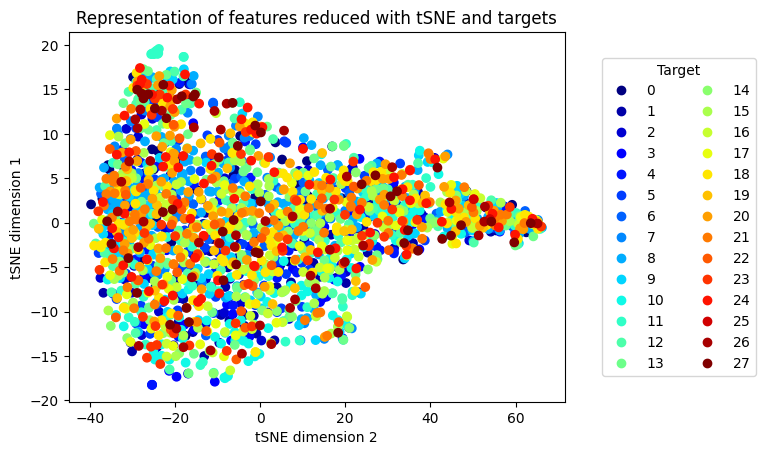

In [20]:
# plt.figure(figsize=(12, 5))
plt.title(f"Representation of features reduced with tSNE and targets")
plt.ylabel("tSNE dimension 1")
plt.xlabel("tSNE dimension 2")
scatter = plt.scatter(
    train_features_reduced[:, 0],
    train_features_reduced[:, 1],
    c=df_train_targets,
    # s=df.gdp/100,
    cmap="jet",
)
# plt.legend(range(0,16))
plt.legend(
    *scatter.legend_elements(num=df_train_targets.unique().size),
    title="Target",
    ncol=2,
    loc="right",
    bbox_to_anchor=(1.4, 0.5),
)
plt.show()

Accuracy with 1 neighbors: 0.07036247334754797
Accuracy with 2 neighbors: 0.06396588486140725
Accuracy with 3 neighbors: 0.04477611940298507
Accuracy with 4 neighbors: 0.04904051172707889
Accuracy with 5 neighbors: 0.053304904051172705
Accuracy with 6 neighbors: 0.04904051172707889
Accuracy with 7 neighbors: 0.053304904051172705
Accuracy with 8 neighbors: 0.04904051172707889
Accuracy with 9 neighbors: 0.04904051172707889
Accuracy with 10 neighbors: 0.04051172707889126
Accuracy with 11 neighbors: 0.042643923240938165
Accuracy with 12 neighbors: 0.046908315565031986
Accuracy with 13 neighbors: 0.046908315565031986
Accuracy with 14 neighbors: 0.042643923240938165
Accuracy with 15 neighbors: 0.042643923240938165


Text(0, 0.5, 'Accuracy')

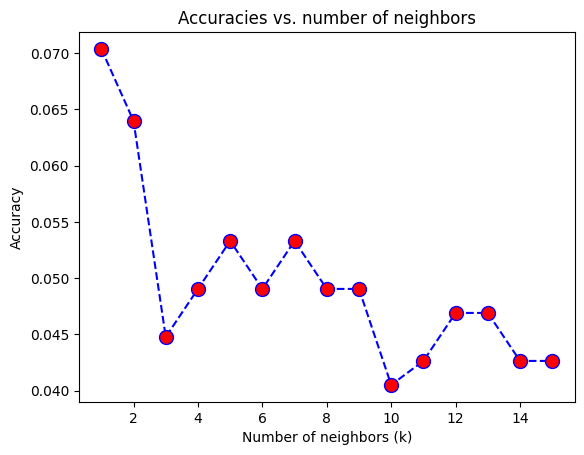

In [21]:
accuracies = []
max_neighbors = 16
for i in range(1, max_neighbors):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(train_features, df_train_targets)
    valid_pred = model_knn.predict(valid_features)
    accuracy = accuracy_score(df_valid_targets, valid_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {i} neighbors: {accuracy}")

# plt.figure(figsize=(10,6))
plt.plot(
    range(1, max_neighbors),
    accuracies,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title("Accuracies vs. number of neighbors")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Accuracy")
# Random (K=1): 0.07036247334754797
# ImageNet (K=1): 0.10660980810234541
# PDDD (K=1): 0.18976545842217485

In [22]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(train_features, df_train_targets)
valid_pred = model_lr.predict(valid_features)
accuracy = accuracy_score(df_valid_targets, valid_pred)
print(f"Accuracy: {accuracy}")
# Random: 0.0021321961620469083
# ImageNet: 0.07889125799573561
# PDDD: 0.14285714285714285

Accuracy: 0.0021321961620469083


d:\Workspace\thesis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
